In [138]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [139]:
cd


C:\Users\HP


In [140]:
os.chdir('C:\\Users\\HP\\OneDrive\\Documents\\DSBDAL\\Ass 5Data Analytics II')

In [141]:
df=pd.read_csv('Social_Network_Ads.csv')

In [142]:
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [143]:
df.tail()

User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

In [144]:
df.shape

(400, 5)

In [145]:
df.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [147]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [148]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [149]:
from sklearn.model_selection import train_test_split
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [151]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [152]:
x_train.shape

(300, 2)

In [153]:
x_test.shape

(100, 2)

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [156]:
prediction=logmodel.predict(x_test)

In [157]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,accuracy_score,precision_score,recall_score

In [158]:
matrix=confusion_matrix(y_test,prediction)
matrix

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [159]:
tn,fp,fn,tp = confusion_matrix(y_test,prediction).ravel()
print(tn,fp,fn,tp )

65 3 8 24


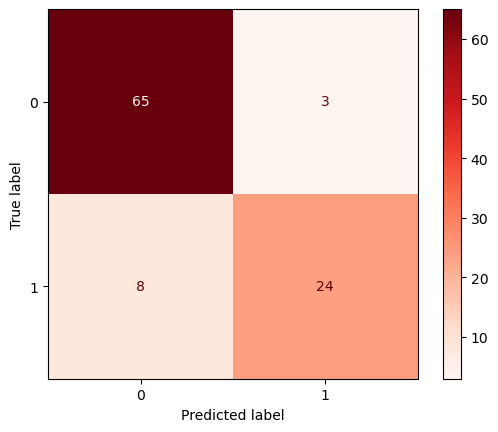

In [166]:
con_mat=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=logmodel.classes_)
con_mat.plot(cmap=plt.cm.Reds)
plt.show()
                                  

In [161]:
print("Confusion matrix:\n", )
print("\nAccuracy: ",accuracy_score(y_test,prediction))
print("\nPrecision: ",precision_score(y_test,prediction))
print("\nRecall: ",recall_score(y_test,prediction))
print("\nError Rate: ",1-accuracy_score(y_test,prediction))


Confusion matrix:


Accuracy:  0.89

Precision:  0.8888888888888888

Recall:  0.75

Error Rate:  0.10999999999999999
